# Multiclass Perceptron


Below tasks are performed.

i. Initialising the parameters

ii. Implementing the main loop

iii. Report

In [176]:
# importing required libraries
require(ggplot2)
require(reshape2)

In [177]:
# loading train data and test data
train = read.csv("Task1D_train.csv")
test = read.csv("Task1D_test.csv")
train.data = train[,-5]
train.y = train[,5]
test.data = test[,-5]
test.y = test[,5]

# preview of how the data looks
dim(train)
head(train.data)
head(train.y)

[1] 75  5

x1,x2,x3,x4
5.1,3.5,1.4,0.2
4.7,3.2,1.3,0.2
5.0,3.6,1.4,0.2
4.6,3.4,1.4,0.3
4.4,2.9,1.4,0.2
5.4,3.7,1.5,0.2


[1] C1 C1 C1 C1 C1 C1
Levels: C1 C2 C3

### i. Initialising the parameters

In [178]:
learning.rate = 0.09
indices = sample(1:nrow(train.data),nrow(train.data),replace=F) # shuffling the data
train.data = train.data[indices,]
train.y = train.y[indices]

iterations = 200

classes = unique(train$y) # available classifications

Phi = as.matrix(cbind('x0' = 1 ,train.data)) # basis function

t=1 # counter for iterations
j=1 # counter for data points visited

# error data frame
error = data.frame('datapoints'=numeric(),
                   'minibatch' = numeric(),
                   'error_test'  = numeric(),
                   'error_train' = numeric())

# training data and testing data lengths
train.len = nrow(train.data)
test.len = nrow(test.data)

# classifications avaliable in training data
classes

[1] C1 C2 C3
Levels: C1 C2 C3

###  function to initialise the weights for each classification
inputs - number of weights and number of columns of basis function
output - random initial values of the weights for each classification

In [179]:
get_weights  = function(w,cols){
    
    # empty weights list
    weights = list()
    
    # for each classification
    for (i in 1:w){
        
        # random values are assigned to the weights
        weights[[i]] = runif(cols)
    }
    return(weights)
}

### Function to get the maximum weight among the available weights.
inputs - weights and the data point

optput - index of the weight that has maximum value

In [180]:
get_maxindex = function(weights,phi){
    
    # empty list to store the calculated value
    values = list()
    
    # for each classification
    for (i in 1:length(weights)){
        
        # value is calculated by matrix multiplication of basis and weight
        values[[i]] = weights[[i]]%*%phi
        
    }
    
    values = unlist(values)
    
    # return the index of the weight with maximum value
    return(which(values==max(values)))
}

### function to return the error (miss classifications)
input - labels, basis function and updated weights

output - number of missclassifications

In [181]:
get_error = function(y,weights,phi){
    
    # initialising the misses
    miss = 0
    
    # for each label
    for (i in 1:length(y)){

        max.index = get_maxindex(weights,phi[i,])

        if (max.index != which(classes == y[i])){
            miss = miss +1
        }

    }
    return(miss/length(y))
}

### main loop

In [182]:
weights = get_weights(length(classes),ncol(Phi))

# condition to terminate when max iteration is reached
while(t <= iterations){
    
    # for each data point
    for (i in 1:nrow(train.data)){
        
        # get max index
        max.index = get_maxindex(weights,Phi[i,])
        # get actual indexe of the classification using classes array
        actual.index = match(train.y[i],classes)
        
        # if prediction is wrong
        if(max.index != actual.index){
            
            # increment the iteratiob
            t= t+1
            
            # decrease the weight for the max index obtained
            weights[[max.index]] = weights[[max.index]] - array(learning.rate*Phi[i,])
            
            # increase the weigth for the actual index obtained
            weights[[actual.index]] = weights[[actual.index]] + array(learning.rate*Phi[i,])
        }
        
        # for every five data points reached calculate miss classifications
        if(j%%5 == 0){
            # list datapoint, minibatch ,test error, train error
            error[nrow(error) + 1,] = list(j,j%/%5,get_error(test.y,weights,Phi),get_error(train.y,weights,Phi))
        }
        
         j = j+1 # increment the data point counter

    }
    
    # dexrease the learning rate
    learning.rate = learning.rate*0.99
}

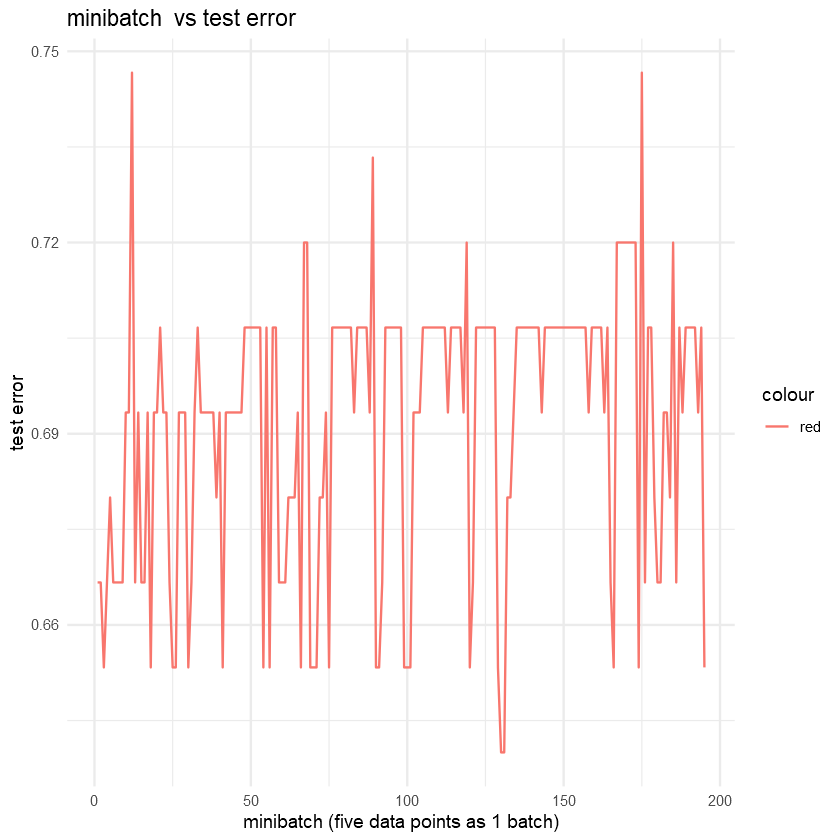

In [183]:
ggplot(aes(minibatch,error_test,color = 'red'),data = error) + geom_line()+ theme_minimal() + 
        ylab("test error") + xlab("minibatch (five data points as 1 batch)") + 
        ggtitle("minibatch  vs test error")

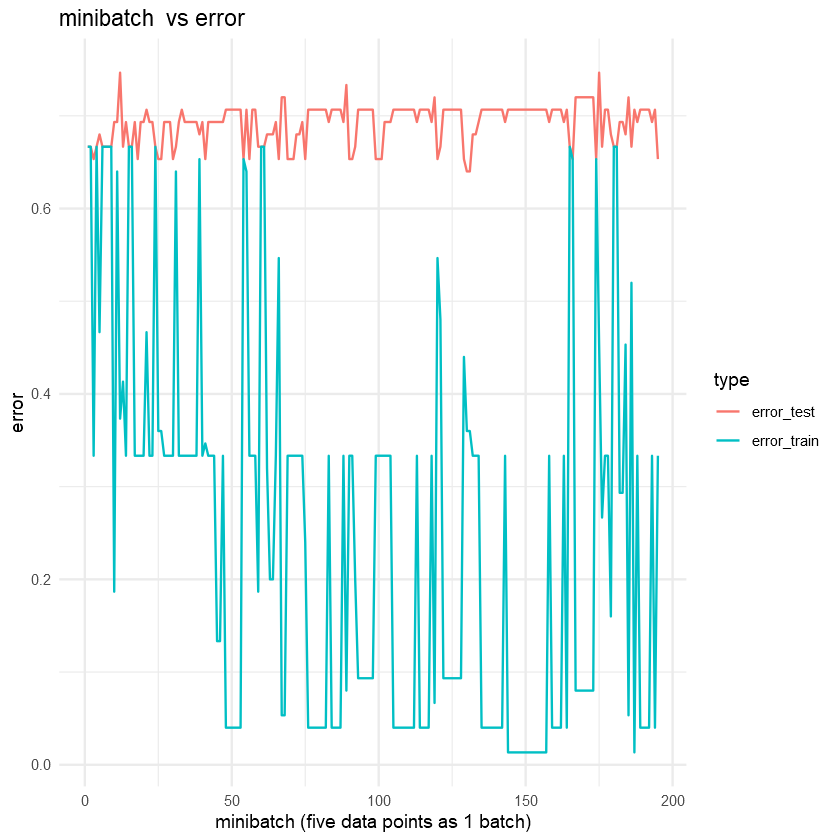

In [185]:
melt.error = melt(error[,-1] , id = 'minibatch')
names(melt.error) = c('minibatch','type','error')

ggplot(aes(minibatch,error,color = type),data = melt.error) + geom_line()+ theme_minimal() + 
        ylab("error") + xlab("minibatch (five data points as 1 batch)") + 
        ggtitle("minibatch  vs error")

### iii. Report
Test error kept fluctuating near 0.66. As there are three classifications and the error is at 0.66 which means 2 out of 3 are missed. This tells that only one of the classification is being predicted corerectly by the model. So, training dtaa points are not sufficient enough to train the model. 